# Part 1. Set up TN heart attack dataframe


In [66]:
# Import Pandas as pd
import pandas as pd
# Import matplot lib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in and inspect data.
ha_costs_df = pd.read_csv('mmd_heart_attack_data.csv')

In [3]:
#Create a new dateframe that only contains data from TN
tn_ha_df = ha_costs_df.loc[ha_costs_df['state'] == 'TENNESSEE']

In [4]:
#Look at descriiption for analysis values
tn_ha_df['analysis_value'].describe()

count       91.000000
mean     45762.989011
std       6574.670462
min      30831.000000
25%      41105.500000
50%      45384.000000
75%      49698.500000
max      62641.000000
Name: analysis_value, dtype: float64

In [5]:
#Create dataframe only containing urban and analysis values
analysis_tn_ha_df = tn_ha_df.iloc[: , [13,16]]

In [6]:
#Group by urban and describe analysis values
analysis_tn_ha_df.groupby('urban').describe()

analysis_value                                                         \
               count          mean          std      min       25%      50%   
urban                                                                         
Rural           53.0  45773.075472  6232.724885  30831.0  41240.00  45384.0   
Urban           38.0  45748.921053  7109.788921  32279.0  40452.75  45496.5   

                         
           75%      max  
urban                    
Rural  48998.0  62641.0  
Urban  50734.5  61541.0

# Part 2. Set up TN cancer dataframe

In [7]:
# Import the data as a pandas dataframe
cancer_costs_df= pd.read_csv('mmd_cancer_data.csv')

In [8]:
#Create a new dateframe that only contains data from TN
tn_cancer_df = cancer_costs_df.loc[cancer_costs_df['state'] == 'TENNESSEE']

In [9]:
#Look at descriiption for analysis values
tn_cancer_df['analysis_value'].describe()

count       95.000000
mean     19757.894737
std       2436.304533
min      15454.000000
25%      18103.500000
50%      19563.000000
75%      21153.000000
max      27740.000000
Name: analysis_value, dtype: float64

In [10]:
#Create dataframe only containing urban and analysis values
analysis_tn_cancer_df = tn_cancer_df.iloc[: , [13,16]]

In [11]:
#Group by urban and describe analysis values
analysis_tn_cancer_df.groupby('urban').describe()

analysis_value                                                         \
               count          mean          std      min       25%      50%   
urban                                                                         
Rural           57.0  19837.421053  2255.416100  15531.0  18328.00  19633.0   
Urban           38.0  19638.605263  2712.218435  15454.0  17674.75  19203.5   

                          
            75%      max  
urban                     
Rural  21315.00  25909.0  
Urban  20556.75  27740.0

# Part 3. Set up IRS TN dataframe

In [12]:
# Import the data as a pandas dataframe
income_df = pd.read_csv('irs_county_2016.csv')

In [13]:
# Keep only the following columns: ['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1',
# 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650',
# 'N02300', 'A02300']
trimmed_income_df = income_df.loc[ : , ['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1',
'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650',
'N02300', 'A02300']]


In [14]:
# Rename the columns
trimmed_income_df.columns = ['state', 'county', 'income_bucket', 'return_count',
'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents',
'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment',
'unemployment_comp']

In [15]:
#Create a new dateframe that only contains data from TN
tn_income_df = trimmed_income_df.loc[trimmed_income_df['state'] == 'TN']

# Clean up data and do some analysis using a column as the parameter

In [16]:
#Determine how unique income buckets there are
tn_income_df['income_bucket'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [17]:
#Create a dictionary with replacement values for dataframe
income_dict = {1: 'Under $1', 2: 'Between 1 and $10,000', 3: 'Between 10,000 and $25,000',
               4: 'Between 25,000 and $50,000', 5: 'Between 50,000 and $75,000', 
               6: 'Between 75,000 and $100,000', 7: 'Between 100,000 and $200,000', 8:'$200,000 or more'}

In [18]:
#Make the replacement within the specified column using the appropriate dictionary
mod_tn_income_df = tn_income_df.replace({"income_bucket": income_dict})

In [19]:
#Group by county and get the sums for each county
income_county_agg = mod_tn_income_df.groupby(by=['county']).sum().reset_index()

In [20]:
income_county_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551


In [21]:
# Build dataframe that only has county values
only_county_income = income_county_agg[~income_county_agg['county'].isin(['Tennessee'])].reset_index()

In [22]:
# Find the county with the max return count 
only_county_income.loc[only_county_income['return_count'].idxmax()]

index                                   78
county                       Shelby County
return_count                        431650
single_returns                      205500
joint_returns                       104290
head_of_house_returns               112920
exemptions                          836590
dependents                          325450
elderly                              86860
agi                               25467506
returns_with_total_inc              430150
total_inc_amt                     25843890
returns_with_unemployment             8020
unemployment_comp                    26306
Name: 78, dtype: object

In [23]:
# Find the county with the greatest total income
only_county_income.loc[only_county_income['agi'].idxmax()]

index                                   78
county                       Shelby County
return_count                        431650
single_returns                      205500
joint_returns                       104290
head_of_house_returns               112920
exemptions                          836590
dependents                          325450
elderly                              86860
agi                               25467506
returns_with_total_inc              430150
total_inc_amt                     25843890
returns_with_unemployment             8020
unemployment_comp                    26306
Name: 78, dtype: object

# Graph the data using the prompts from Week 3 task

In [24]:
# Build a dataframe that only contains values for the entire state of TN.
only_tn_income = mod_tn_income_df.loc[mod_tn_income_df['county'] == 'Tennessee']

In [25]:
# Show dataframe so I can check what I am plotting
only_tn_income

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,Under $1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,"Between 1 and $10,000",439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,"Between 10,000 and $25,000",717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,"Between 25,000 and $50,000",759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,"Between 50,000 and $75,000",396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894
19757,TN,Tennessee,"Between 75,000 and $100,000",241730,43690,182110,12690,606940,183160,71640,20916820,241730,21167809,6350,21411
19758,TN,Tennessee,"Between 100,000 and $200,000",298270,33380,254300,8230,807590,255170,91150,39800165,298270,40397276,5490,20281
19759,TN,Tennessee,"$200,000 or more",97920,8640,85910,1760,281650,97810,31990,50066256,97920,51122320,560,2401


<BarContainer object of 8 artists>

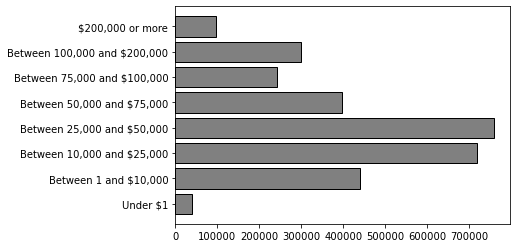

In [46]:
plt.barh('income_bucket', 'return_count', data=only_tn_income, color = 'gray', edgecolor = 'black')

In [27]:
# Create a calculated column in the `income_county_agg` DataFrame 
# which gives the approximate average household income for each county. 
# Calculate this as 1000*`total_inc_amt` / `return_count`.

only_county_income['avg_household_inc'] = (1000*only_county_income['total_inc_amt'])/only_county_income['return_count']

In [28]:
# Check and make sure the calculation worked OK
only_county_income.head(5)

,index,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_household_inc
0,0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53382.385535
1,1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47127.581262
2,2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119,41296.671710
3,3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458,39743.640351
4,4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551,56786.162888


(array([25., 49., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 32573.1277533 ,  42292.71209811,  52012.29644292,  61731.88078773,
         71451.46513254,  81171.04947735,  90890.63382216, 100610.21816697,
        110329.80251178, 120049.38685659, 129768.9712014 ]),
 <a list of 10 Patch objects>)

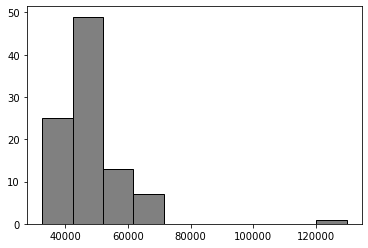

In [65]:
# Create a histogram showing the distribution of average incomes across all counties in Tennessee. 
# Be sure to remove the Tennessee row prior to creating this histogram.
plt.hist('avg_household_inc', data=only_county_income, color = 'gray', edgecolor = 'black')

Text(0.5, 1.0, 'cancer analysis values vs urban')

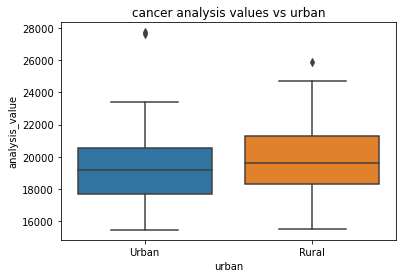

In [68]:
# For both `tn_cancer_costs` and `tn_ha_costs`, 
# create boxplots and swarmplots comparing the distribution of analysis_value 
# for urban counties vs. rural counties. What do you notice?
sns.boxplot(y=analysis_tn_cancer_df.analysis_value, x = analysis_tn_cancer_df.urban)
plt.title('cancer analysis values vs urban')

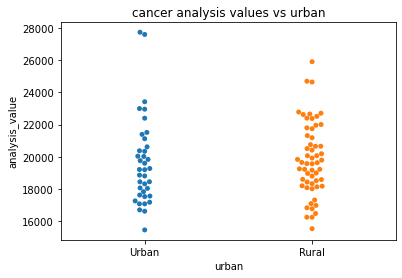

In [70]:
sns.swarmplot(y=analysis_tn_cancer_df.analysis_value, x = analysis_tn_cancer_df.urban)
plt.title('cancer analysis values vs urban');

Text(0.5, 1.0, 'heart attack analysis values vs urban')

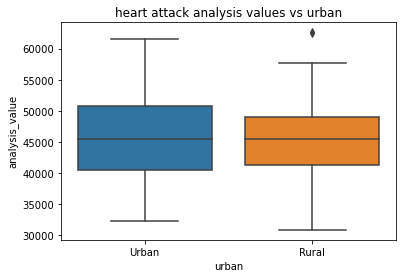

In [69]:
sns.boxplot(y=analysis_tn_ha_df.analysis_value, x = analysis_tn_ha_df.urban)
plt.title('heart attack analysis values vs urban')

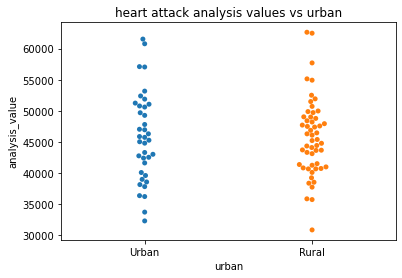

In [71]:
sns.swarmplot(y=analysis_tn_ha_df.analysis_value, x = analysis_tn_ha_df.urban)
plt.title('heart attack analysis values vs urban');